In [21]:
#DATA SET LINK - https://www.kaggle.com/datasets/michau96/restaurant-business-rankings-2020

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
df = pd.read_csv("/content/Future50.csv")
df.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [24]:
df['Franchising'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df.isnull().sum()

Rank           0
Restaurant     0
Location       0
Sales          0
YOY_Sales      0
Units          0
YOY_Units      0
Unit_Volume    0
Franchising    0
dtype: int64

In [26]:
df['Franchising'] = pd.get_dummies(df['Franchising'], drop_first=True)
df1 = pd.get_dummies(df['Franchising'])
df1.head()

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
df = pd.concat([df, df1], axis=1)
df.drop('Franchising', axis=1, inplace=True)
df.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,0,1
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,1,0
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,0,1
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,0,1
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,0,1
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,0,1


In [28]:
df.shape

(50, 10)

In [29]:
df.isnull().sum()

Rank           0
Restaurant     0
Location       0
Sales          0
YOY_Sales      0
Units          0
YOY_Units      0
Unit_Volume    0
0              0
1              0
dtype: int64

In [30]:
Price = df['YOY_Sales']
for i in range(len(Price)):
  if '%' in Price[i]:
    Price[i] = Price[i].strip('%')

<ipython-input-30-5d1c0c7828d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Price[i] = Price[i].strip('%')


In [31]:
df['YOY_Sales'] = pd.to_numeric(df['YOY_Sales'])

In [32]:
Price = df['YOY_Units']
for i in range(len(Price)):
  if '%' in Price[i]:
    Price[i] = Price[i].strip('%')

<ipython-input-32-358772b605a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Price[i] = Price[i].strip('%')


In [33]:
df['YOY_Units'] = pd.to_numeric(df['YOY_Units'])

In [34]:
x = df.drop(['Sales', 'Restaurant', 'Location', 'Rank'], axis=1)
y = df['Sales']

In [36]:
x.columns = x.columns.astype(str)
scaler = MinMaxScaler()
s = scaler.fit_transform(x)

In [38]:
x = pd.DataFrame(s, columns = x.columns)
x.head()

,YOY_Sales,Units,YOY_Units,Unit_Volume,0,1
0,1.000000,0.193878,1.000000,0.178618,1.0,0.0
1,0.925926,1.000000,0.802130,0.024772,0.0,1.0
2,0.573643,0.142857,0.771074,0.235984,0.0,1.0
3,0.562446,0.397959,0.484472,0.057366,0.0,1.0
4,0.540052,0.438776,0.464064,0.194263,0.0,1.0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=42)

In [41]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)
print("R-Square Value:",r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R-Square Value: 0.018900926010621655
MSE: 69.47162542918787


In [43]:
df.describe()

,Rank,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,0,1
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,25.50000,33.780000,33.698000,34.700000,27.446000,1592.60000,0.420000,0.580000
std,14.57738,9.596534,24.549205,24.527577,23.231051,994.67677,0.498569,0.498569
min,1.00000,20.000000,14.400000,7.000000,4.000000,465.00000,0.000000,0.000000
25%,13.25000,24.250000,20.900000,16.000000,14.300000,867.50000,0.000000,0.000000
50%,25.50000,34.500000,25.500000,27.000000,19.900000,1260.00000,0.000000,1.000000
75%,37.75000,42.000000,33.825000,45.500000,32.675000,2020.00000,1.000000,1.000000
max,50.00000,49.000000,130.500000,105.000000,116.700000,4300.00000,1.000000,1.000000


In [44]:
x1 = scaler.inverse_transform(x_test)
data = pd.DataFrame(x1, columns = x.columns)
data['y_pred'] = y_pred
data

,YOY_Sales,Units,YOY_Units,Unit_Volume,0,1,y_pred
0,33.0,48.0,37.1,1175.0,1.0,0.0,38.083956
1,19.5,21.0,16.7,1510.0,0.0,1.0,27.582823
2,23.0,26.0,4.0,785.0,0.0,1.0,27.598350
3,17.6,25.0,13.6,2050.0,0.0,1.0,30.965779
4,30.1,77.0,24.2,535.0,0.0,1.0,44.128462
5,16.0,13.0,8.3,2550.0,1.0,0.0,31.832386
6,24.6,37.0,23.3,1330.0,1.0,0.0,35.658737
7,25.4,15.0,15.4,2820.0,1.0,0.0,32.545395
8,22.4,44.0,22.2,1050.0,1.0,0.0,37.528284
9,28.9,33.0,10.0,1260.0,0.0,1.0,31.016413


In [45]:
import statsmodels.api as sm
x_train1 = sm.add_constant(x_train)
lm_1 = sm.OLS(y_train, x_train1).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     6.864
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           0.000159
Time:                        12:59:31   Log-Likelihood:                -132.87
No. Observations:                  40   AIC:                             277.7
Df Residuals:                      34   BIC:                             287.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.5401      2.692      5.401      0.000       9.069      20.011
YOY_Sales      -6.2907     12.154     -0.518      0.608     -30.990      18.408
Units          35.8599      6.411      5.593      0.000      22.831      48.889
YOY_Units      -5.4417     12.452     -0.437      0.665     -30.746      19.863
Unit_Volume    11.8363      7.455      1.588      0.122      -3.314      26.987
0               8.9560      2.613      3.428      0.002       3.647      14.265
1               5.5841      1.809      3.087      0.004       1.908       9.260
==============================================================================
Omnibus:                        2.489   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                2.034
Skew:                           0.550   Prob(JB):                        0.362
Kurtosis:                       2.900   Cond. No.                     2.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.19e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

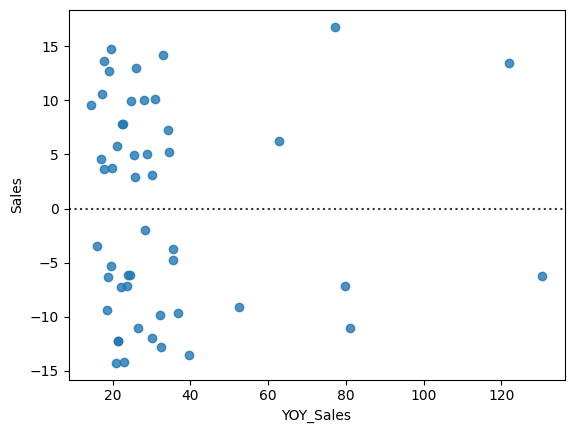

In [46]:
sns.residplot(x= 'YOY_Sales', y=y,data=df)
plt.show()

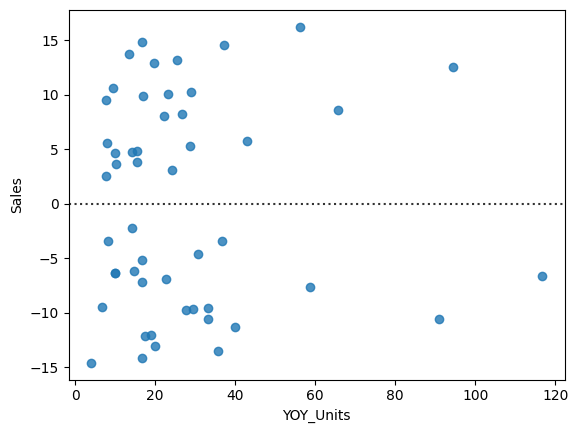

In [47]:
sns.residplot(x="YOY_Units", y=y, data=df)
plt.show()

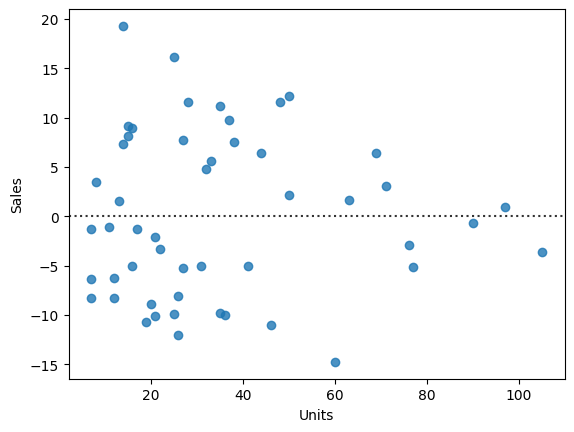

In [49]:
sns.residplot(x='Units', y=y, data=df)
plt.show()

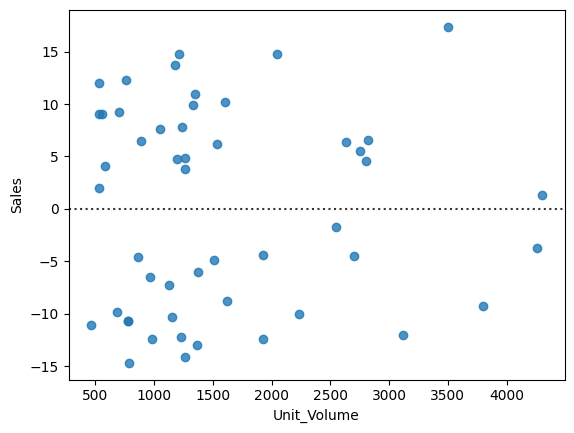

In [50]:
sns.residplot(x="Unit_Volume", y=y, data=df)
plt.show()